<a href="https://colab.research.google.com/github/wheemin-2/24-2-ESAA/blob/main/1004_HW_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **분류**

**분류의 다양한 머신러닝 알고리즘**

* 나이브 베이즈 (Naive Bayes) : 베이즈 통계와 생성 모델에 기반
* 로지스틱 회귀 (Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반
* 서포트 벡터 머신 (Support Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌
* 최소 근접 알고리즘 (Nearest Neighbor) : 근접 거리를 기준으로 함
* 신경망 (Neural Network) : 심층 연결 기반
* 앙상블 (Ensemble) : 서로 다른(또는 같은) 머신 러닝 알고리즘을 결합함

## **결정 트리 (Decision Tree)**

* 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것

 ![Decision Tree](https://images.velog.io/images/ljs7463/post/f2da1e98-f4ee-408a-bb8b-444bbcd04997/bandicam%202021-06-15%2021-24-03-854.jpg)

    * 규칙 노드(Decision Node) : 규칙 조건
    * 리프 노드(Leaf Node) : 결정된 클래스 값
    * 서브 트리(Sub Tree) : 새로운 규칙 조건마다 생성됨
    * 데이터 세트에 피처가 있고, 피처가 결합해 규칙 조건을 만들 때마다 규칙 노드가 만들어짐

* 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높음, 규칙이 많다는 것은 분류를 결정하는 방식이 더 복잡해진다는 것이고 이는 과적합으로 이어지기 쉽기 때문

* 따라서 가능한 한 적은 결정 노드로 높은 예측 정확도를 갖게 해야함
* 이를 위해서는 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야함
     * 어떻게 트리를 Split 할 것인가가 중요, 최대한 **균일한** 데이터 셋을 구성해야함
* 결정 노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦
    * ex) 노랑 : 동그라미, 빨강/파랑 : 동그라미/세모/네모 인 블럭이 30개 있는 경우, 각 레고 블록을 형태와 색깔 속성으로 분류하고자 할 때 가장 첫 번째로 만들어져야하는 규칙은 if 색깔 == '노란색'
    * 노란색인 경우 동그라미 블록으로 가장 쉽게 예측할 수 있기 때문

**정보 이득(Information Gain) 지수**

* 정보의 균일도를 측정하는 방법
* 엔트로피 개념을 기반으로 함
    * 엔트로피 : 주어진 데이터 지합의 혼잡도
    * 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여있으면 낮음
* 1 - (엔트로피 지수)
* 결정 트리는 정보 이득이 높은 속성을 기준으로 분할함

**지니 계수**

* 0이 가장 평등하고 1로 갈수록 불평등함
    * 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수
* 지니 계수가 낮을 수록 데이터의 균일도가 높은 것으로 해석
* 결정 트리는 지니 계수가 낮은 속성을 기준으로 분할함
* 사이킷런 DecisionTreeClassifier : 지니 계수 이용

## **결정 트리 모델의 특징**

**장점**

- 정보의 '균일도'를 기반으로 하고 있어 알고리즘이 쉽고 직관적
- 룰(균일도)이 매우 명확하고, 이에 기반해 어떻게 규칙 노드와 리프 노드가 만들어 지는지 알 수 있고, 시각화로 표현까지 할 수있음
- 균일도만 신경쓰면 되기 때문에 대체로 스케일링/정규화 같은 전처리 작업이 필요 없음


**단점**

- 과적합으로 정확도가 떨어짐
- 피처 정보의 균일도에 따른 룰 규칙으로 서브 트리를 계속 만들다 보면 피처가 많고 균일도가 다양하게 존재할수록 트리의 깊이가 커지고 복잡해짐 > 실제 상황에 대한 예측 성능 떨어짐
    - 트리의 크기를 사전에 제한하는 튜닝이 필요

## **결정 트리 파라미터**

- 사이킷런의 결정 트리 클래스 : DecisionTreeClassifier(), DecisionTreeRegressor()
- CART(Classification And Regression Trees) 알고리즘 기반
    - 분류/회귀에 모두 사용되는 트리 알고리즘



```
DecisionTreeClassifier(min_samples_split, min_samples_leaf, max_features=None, max_depth=None, max_leaf_nodes)
```

* min_samples_split
    - 노드를 분할하기 위한 최소한의 샘플 데이터 수
    - 과적합을 제어하는 데 사용
    - default : 2, 작게 설정할수록 분할되는 노드가 많아져 과적합 가능성 증가

* min_samples_leaf
    - 분할이 될 경우 왼쪽과 오른쪽의 브랜치 노드에서 가져야 할 최소한의 샘플 데이터 수
    - 큰 값으로 설정 될 수록 노드 분할을 상대적으로 덜 수행
    - 과적합을 제어하는 데 사용
    - 비대칭적(imbalanced) 데이터의 경우에는 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우에는 작게 설정해야함

* max_features
    - 최적의 분할을 위해 고려할 최대 피처 개수
    - default : None (데이터 세트의 모든 피처를 사용해 분할 수행)
    - int 형으로 지정 시 대상 피처의 개수
    - float 형으로 지정 시 전체 피처 중 대상 피처의 %

* max_depth
    - 트리의 최대 깊이
    - default : None (완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할)
    - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합 할 수 있으므로 적절한 값으로 제어 필요

* max_leaf_nodes
    - 말단 노드(Leaf)의 최대 개수



## **결정 트리 모델의 시각화**

- Graphviz 패키지 사용
- 사이킷런의 export_graphviz() API를 이용하여 Graphviz 패키지와 쉽게 인터페이스할 수 있음



```
export_graphviz(Estimator, out_file, class_names, feature_names)
```
- Estimator : 학습이 완료된 estimator
- out_file : output 파일 명
- class_names : 결정 클래스의 명칭 (레이블 이름 리스트)
- feature_names : 피처의 이름 리스트




In [1]:
# iris 데이터 세트로 DecisionTreeClassifier 학습 후 규칙 트리 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

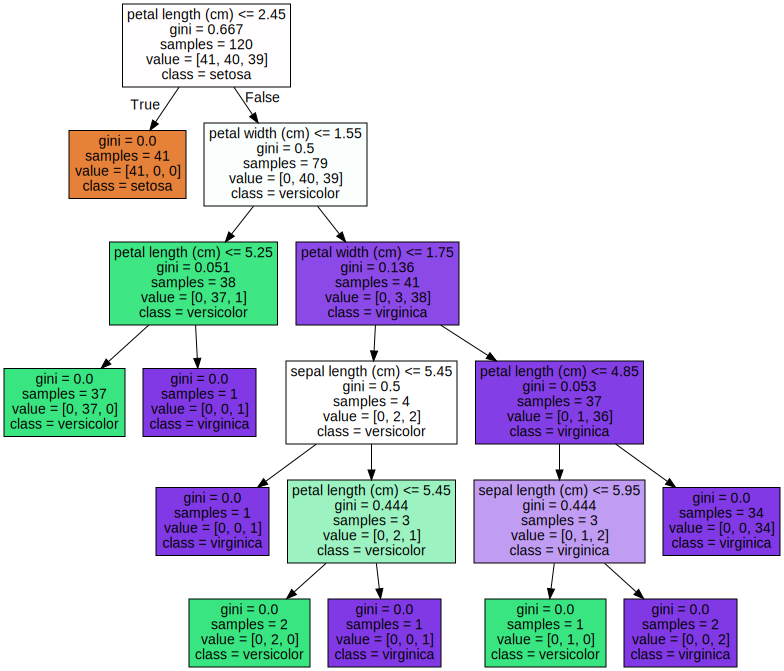

In [3]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 코랩에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**트리 구성 설명**

- 피처의 조건 (ex. petal length(cm) <= 2.45) : 자식 노드를 만들기 위한 규칙 조건, 이 조건이 없으면 리프 노드
- samples : 현 규칙에 해당하는 데이터 건수
- gini : value=[ ]로 주어진 데이터 분포에서의 지니 계수
- value = [ ] 클래스 값 기반의 데이터 건수
    - 붓꽃 데이터 세트에서 0 : Setosa, 1 : Versicolor, 2 : Virginica
    - value = [41,40,39] : Setosa 41개, Versicolor 40개, Virginica 39개
- class = setosa : 하위 노드를 가질 경우에 setosa의 개수가 가장 많다
- 각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미
    - 주황색 : 0, setosa / 초록색 : 1, versicolor / 보라색 : 2, virginica
- 노드의 색이 짙어질 수록 지니 계수가 낮고, 샘플 데이터가 많다는 의미



---



**max_depth**

- 결정 트리의 최대 트리 깊이를 제어함

- default : 제약 없음, 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어감 > 과적합의 문제

- 제약 없음 > max_depth = 3 으로 변경한 결과 더 간단한 결정 트리 완성

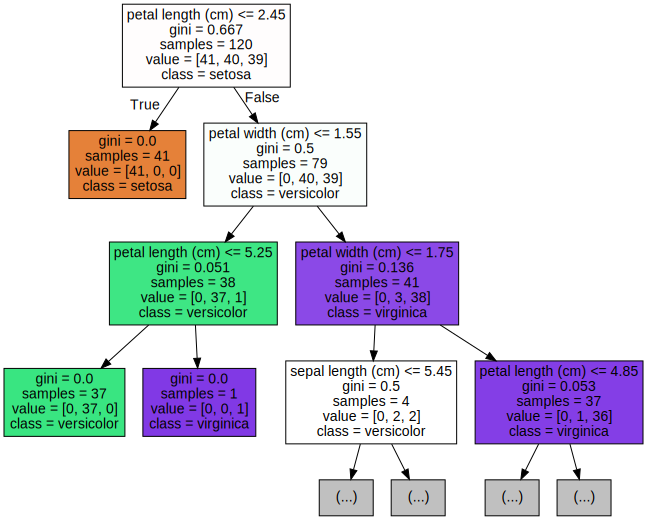

In [4]:
# max_depth 하이퍼 파라미터 변경 결과
# max_depth는 DecisionTreeClassifier() 클래스, export_graphviz()에서 모두 설정 가능
export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, max_depth = 3, impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**min_samples_split**
* 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

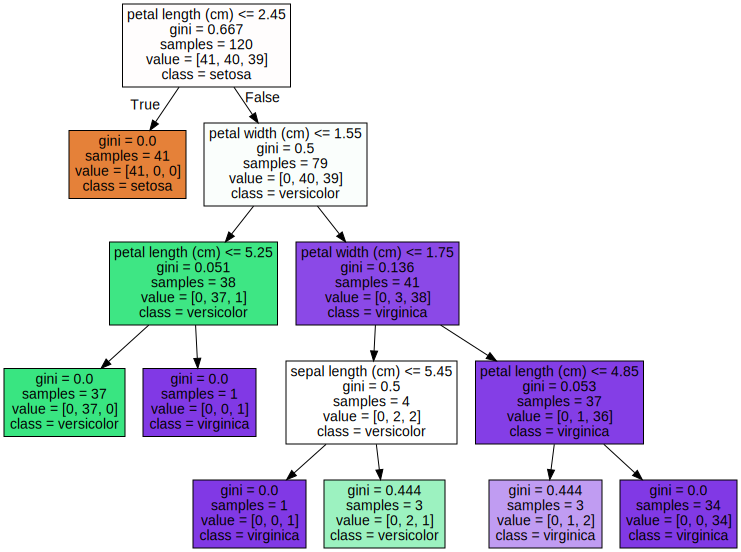

In [5]:
# min_samples_split 변경 결과
# min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수

# min_samples_split은 DecisionTreeClassifier 클래스의 parameter
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* 맨 아래 리프 노드 중 서로 상이한 클래스 값이 있는 노드가 2개 있음 ( value = [0,2,1], value = [0,1,2] )
* **min_samples_split = 4** : 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요하지만 3개 밖에 없으므로 더 이상 분할하지 않고 리프 노드가 됨
* 트리 깊이도 줄었고, 간결한 결정트리가 생성됨


**min_samples_leaf**

* 분할될 경우 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정
* 어떤 노드가 분할할 경우, 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 값보다 더 작은 데이터 건수를 갖게 된다면 해당 노드를 더 이상 분할하지 않고 리프 노드로 둠
* min_samples_leaf의 값을 키우게 되면 리프 노드가 될 수 있는 가능성이 높아짐
* **min_samples_leaf = 4** :노드가 분할될 경우 자식 노드들이 모두 샘플 데이터 건수가 4 이상을 만족할 수 있는지를 확인한 후에 분할을 수행하게 됨

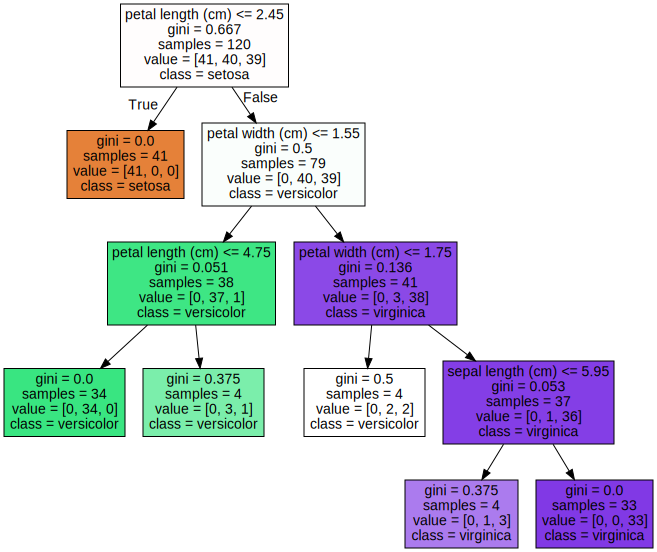

In [6]:
# min_samples_leaf 하이퍼 파라미터 변경 결과
# default = 1 에서 4로 변경

dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)
dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file = 'tree.dot', class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## **feature_importances_ 속성**

* 결정 트리는 균일도에 기반해 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건임
* 중요한 몇 가지의 피처가 명확한 규칙 트리를 만드는 데 크게 기여하며 모델을 더 간결하고 Outlier에 강한 모델을 만들 수 있음
* 사이킷런 : DecisionTreeClassifier 객체의 feature_importances_ 속성을 통해 피처의 중요도 지표를 제공

* 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값으로 표현한 것
    * 일반적으로 값이 높을수록 해당 피처의 중요도가 높음을 의미

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

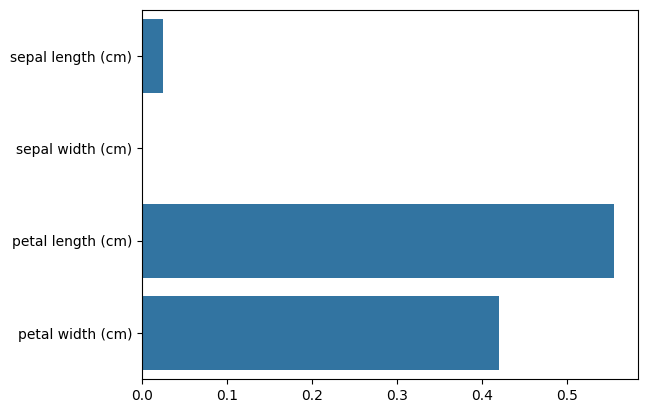

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매칭
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

petal length의 피처 중요도가 가장 높음

## **결정 트리 과적합(Overfitting)**

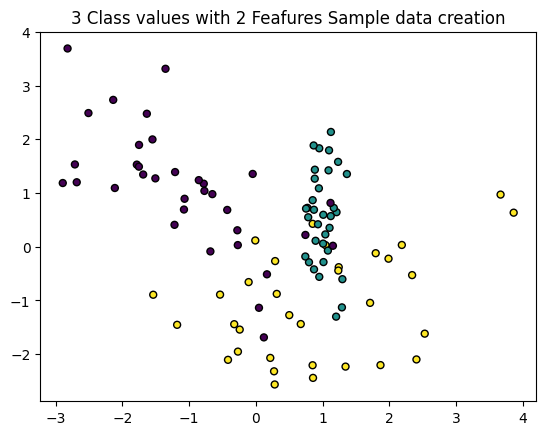

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title('3 Class values with 2 Feafures Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 시각화
# 각 피처의 값이 (X,Y), 3개의 클래스(label)이 색깔로 구분 됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

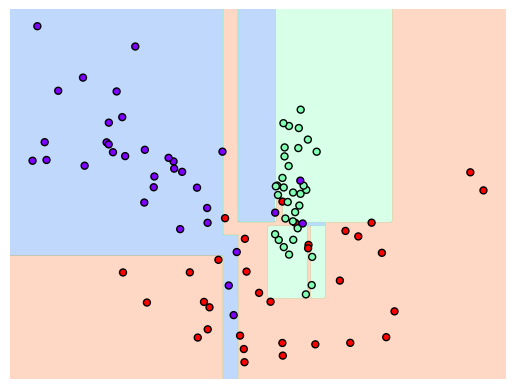

In [9]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

visualize_boundary(dt_clf, X_features, y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음

-> 예측 정확도가 떨어짐 (train data에서만 예측 잘함)

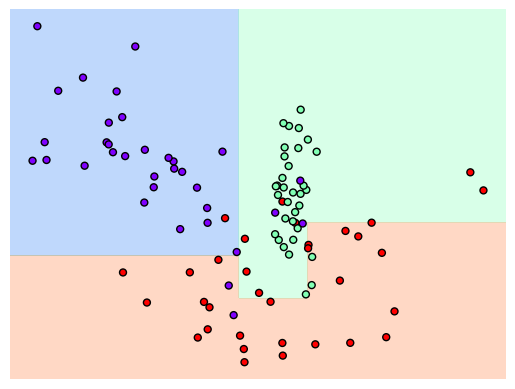

In [10]:
# min_samples_leaf = 6 으로 설정하여 노드 생성 규칙을 완화한 뒤 결과 확인
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

이상치에 크게 반응하지 않으면서 좀 더 일반화된 분류 규칙에 따라 분류되었음



---



## **결정 트리 실습 - 사용자 행동 인식 데이터 세트**

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
# 피처명 index를 제거, 피처명만 리스트 객체로 생성
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


피처명 : 인체의 움직임과 관련된 속성의 평균/표준편차가 X,Y,Z 축 값으로 되어있음


In [13]:
# 중복된 피처명 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())    # 42개의 피처명이 중복됨
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [14]:
# 중복된 피처명에 대해서 원본 피처명에 _1 또는 _2를 추가하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data = old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                        if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [15]:
# 데이터 로드 함수 생성

def get_human_dataset():
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/features.txt',
                                   sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # train/test dataset 로딩, 칼럼명은 feature_name 적용 (레이블명은 'action')
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/X_test.txt', sep='\s+', names=feature_name)

    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/y_train.txt', header=None, names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/y_test.txt', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [16]:
# 확인
# 7352 x 561
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
# 레이블 값 : 1,2,3,4,5,6
# 비교적 고르게 분포
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


In [20]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24], 'min_samples_split':[16]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치 : 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth=8 일 때 5개의 폴드 세트의 최고 평균 정확도 결과가 약 85.49%


In [22]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


mean_test_score : 5개 cv 세트에서 검증용 데이터 세트의 정확도 평균 수치

In [24]:
# 별도의 test dataset 에서 결정 트리의 정확도 측정
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


In [25]:
# max_depth, min_samples_split을 같이 변경하면서 정확도 성능 튜닝
params = {'max_depth':[8,12,16,20], 'min_samples_split':[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


In [26]:
# 별도의 test dataset에 해당 하이퍼 파라미터 적용

best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


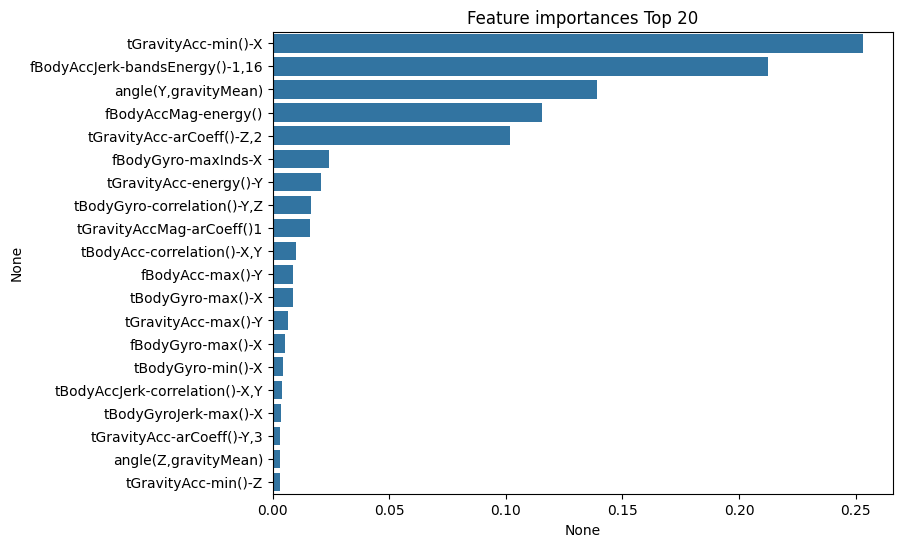

In [27]:
# 결정 트리에서 각 트리의 중요도 확인하기

import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Seaborn의 barplot으로 쉽게 표현하기 위해 Series로 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도 값 순으로 series 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

상위 5개의 피처들은 매우 중요하게 규칙 생성에 영향을 미치고 있음